In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['svg.fonttype'] = 'none'


In [2]:
sa_compare = {'sprot_human': (156, 2855, 1342), 'IGC': (551, 42455, 10350), 'sprot_all': (307, 7854, 4316), 'sprot_bacteria_human': (289, 8280, 3615), 'trypsin': (
    487, 148935, 3759), 'chymo': (1636, 85355, 42907), 'lysc': (523, 82561, 4481), 'gluc': (1234, 56159, 26875), 'davis': (221, 33849, 4591)}

pcc_compare = {'sprot_human': (56, 2368, 1894), 'IGC': (1319, 41537, 11394), 'sprot_all': (559, 6799, 4020), 'sprot_bacteria_human': (601, 7302, 3021), 'trypsin': (
    1014, 148395, 5168), 'chymo': (4150, 87146, 37826), 'lysc': (912, 81771, 4887), 'gluc': (1946, 55112, 28760), 'davis': (338, 32086, 6158)}


In [3]:
pdeep_prosit_compare = {'sprot_human': (90, 3953, 901), 'IGC': (626, 51523, 5100), 'sprot_all': (344, 11451, 2198), 'sprot_bacteria_human': (
    385, 11240, 1763), 'trypsin': (636, 150238, 3575), 'chymo': (2083, 130692, 8170), 'lysc': (532, 84800, 3376), 'gluc': (960, 88327, 5525), 'davis': (221, 37955, 1088)}

prosit_prosit_compare = {'sprot_human': (95, 4280, 620), 'IGC': (518, 53815, 2891), 'sprot_all': (255, 12703, 1523), 'sprot_bacteria_human': (
    246, 12535, 1299), 'trypsin': (751, 150320, 2897), 'chymo': (1450, 133762, 6186), 'lysc': (764, 84864, 3174), 'gluc': (979, 89560, 3862), 'davis': (234, 38079, 1053)}


In [4]:
def number2str(num, interal=3):
    new_num = []
    for i, s in enumerate(str(num)[::-1]):
        if i!=0 and i%interal == 0:
            new_num.append(",")
        new_num.append(s)
    return "".join(new_num[::-1])
    
def autolabel(rects, ax, numbers, percent_number, mode="inside", fontsize=12, select_idx=None, inside_height=0.35):
    assert len(rects) == len(numbers)
    for idx, rect in enumerate(rects):
        height = rect.get_height()
        if select_idx is not None and idx not in select_idx:
            continue
        if mode == 'inside':
            ax.text(rect.get_x() + rect.get_width()/2., inside_height*height + rect.get_y(),
                    number2str(numbers[idx]) + f"({percent_number[idx]:.1f}%)",
                    ha='center', va='bottom', rotation=90, color='white', fontsize=fontsize)
        if mode == 'upper':
            ax.text(rect.get_x() + rect.get_width()/2., rect.get_y() + height + 3,
                    number2str(numbers[idx]) + f"({percent_number[idx]:.1f}%)",
                    ha='center', va='bottom', rotation=90, color='black', fontsize=fontsize)
        if mode == 'bottom':
            ax.text(rect.get_x() + rect.get_width()/2., rect.get_y()+height,
                    number2str(numbers[idx]) + f"({percent_number[idx]:.1f}%)",
                    ha='center', va='top', rotation=90, color='black', fontsize=fontsize)


In [ ]:
from matplotlib.patches import FancyBboxPatch
labels = ["trypsin", 'lysc', 'chymo', 'gluc', "davis"]
show_labels = ["Trypsin",  'Lys-C', 'Chymo', 'Glu-C', "Davis(tryptic)"]
losses = [-sa_compare[l][0]/sum(sa_compare[l][:2])*100 for l in labels]
shares = [sa_compare[l][1]/sum(sa_compare[l][:2])*100 for l in labels]
gains = [sa_compare[l][2]/sum(sa_compare[l][:2])*100 for l in labels]

losses_num = [sa_compare[l][0] for l in labels]
shares_num = [sa_compare[l][1] for l in labels]
gains_num = [sa_compare[l][2] for l in labels]

width = 0.6

fig, ax = plt.subplots(figsize=(6,9) ,dpi=100)

ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax.axhline(100, color='black', linewidth=0.8, linestyle='--')

p1 = ax.bar(show_labels, losses, width, label='Loss', color='orange', linewidth=0.1, edgecolor = "black")
p2 = ax.bar(show_labels, shares, width, label='Shared', 
            color='darkslateblue', linewidth=1.2, edgecolor = "black")
p3 = ax.bar(show_labels, gains, width, label='Gain',
            bottom=shares, color='darkgreen', linewidth=1.2, edgecolor="black")

num_size = 10
autolabel(p1, ax, losses_num, [abs(i) for i in losses], mode='bottom', fontsize=num_size)
autolabel(p2, ax, shares_num, shares,fontsize=num_size)
autolabel(p3, ax, gains_num, gains, mode='upper', select_idx=[0, 1, 4], fontsize=num_size)
autolabel(p3, ax, gains_num, gains, mode='inside',
          select_idx=[2, 3], fontsize=num_size, inside_height=0.1)

ax.set_ylabel('Identified Peptides(%)', fontsize=15)
ax.set_title('Fine-tuned SA with 1% FDR', fontsize=15)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax.set_ylim(-30, 160)
ax.get_yaxis().set_ticks([20*i for i in range(8)])
ax.tick_params(axis='x', labelsize=15)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['left'].set_bounds(0, 140)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
fig.autofmt_xdate(rotation=35)
plt.show()


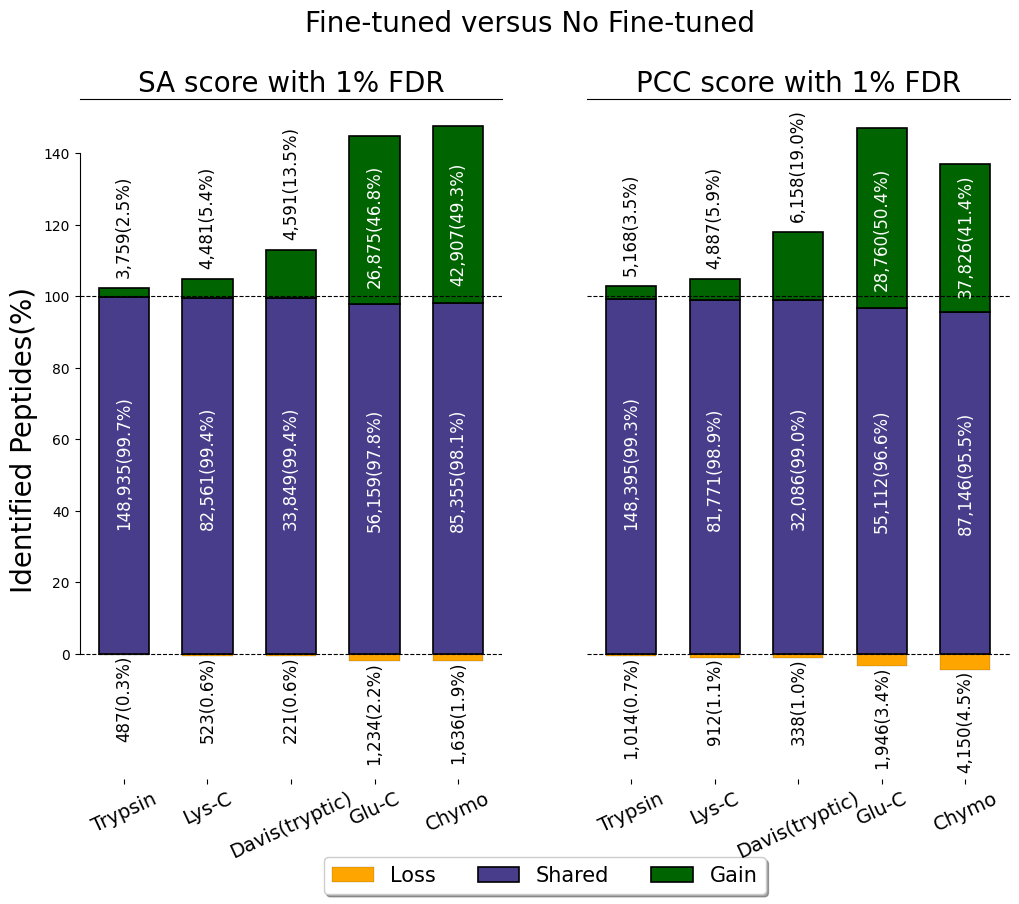

In [6]:
from matplotlib.patches import FancyBboxPatch
labels = ["trypsin", 'lysc', "davis", 'gluc', 'chymo']
show_labels = ["Trypsin", 'Lys-C', "Davis(tryptic)", 'Glu-C', 'Chymo']
losses = {}
shares = {}
gains = {}

losses_num = {}
shares_num = {}
gains_num = {}

losses['SA score'] = [-sa_compare[l][0]/sum(sa_compare[l][:2])*100 for l in labels]
shares['SA score'] = [sa_compare[l][1]/sum(sa_compare[l][:2])*100 for l in labels]
gains['SA score'] = [sa_compare[l][2]/sum(sa_compare[l][:2])*100 for l in labels]

losses_num['SA score'] = [sa_compare[l][0] for l in labels]
shares_num['SA score'] = [sa_compare[l][1] for l in labels]
gains_num['SA score'] = [sa_compare[l][2] for l in labels]

losses['PCC score'] = [-pcc_compare[l][0]/sum(pcc_compare[l][:2])*100 for l in labels]
shares['PCC score'] = [pcc_compare[l][1]/sum(pcc_compare[l][:2])*100 for l in labels]
gains['PCC score'] = [pcc_compare[l][2]/sum(pcc_compare[l][:2])*100 for l in labels]

losses_num['PCC score'] = [pcc_compare[l][0] for l in labels]
shares_num['PCC score'] = [pcc_compare[l][1] for l in labels]
gains_num['PCC score'] = [pcc_compare[l][2] for l in labels]

width = 0.6

names = ['SA score', 'PCC score']
fig, axs = plt.subplots(1, 2, figsize=(12, 9), dpi=100)

labels = [i[0].capitalize() + i[1:] for i in labels]
for i, (name, ax) in enumerate(zip(names, axs)):
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.axhline(100, color='black', linewidth=0.8, linestyle='--')

    p1 = ax.bar(show_labels, losses[name], width, label='Loss',
                color='orange', linewidth=0.1, edgecolor="black")
    p2 = ax.bar(show_labels, shares[name], width, label='Shared',
                color='darkslateblue', linewidth=1.2, edgecolor="black")
    p3 = ax.bar(show_labels, gains[name], width, label='Gain',
                bottom=shares[name], color='darkgreen', linewidth=1.2, edgecolor="black")

    num_size = 12
    autolabel(p1, ax, losses_num[name], [abs(i) for i in losses[name]], mode='bottom', fontsize=num_size)
    autolabel(p2, ax, shares_num[name], shares[name],fontsize=num_size)
    autolabel(p3, ax, gains_num[name], gains[name],mode='upper',
            select_idx=[0, 1, 2], fontsize=num_size)
    autolabel(p3, ax, gains_num[name], gains[name],mode='inside',
            select_idx=[3, 4], fontsize=num_size, inside_height=0.1)

    if i ==0:
        ax.set_ylabel('Identified Peptides(%)', fontsize=20)
        ax.legend(loc='upper center', bbox_to_anchor=(1.1, -0.1),
                  fancybox=True, shadow=True, ncol=5, prop={'size': 15})
    ax.set_title(f'{name} with 1% FDR', fontsize=20)
    if i == 0:
        ax.get_yaxis().set_ticks([20*i for i in range(8)])
        ax.spines['left'].set_bounds(0, 140)
    else:
        ax.get_yaxis().set_ticks([])
        ax.spines['left'].set_visible(False)
    ax.set_ylim(-35, 155)
    # ax.tick_params(axis='x', labelsize=15)
    # ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', labelsize=14, rotation=25)

# fig.autofmt_xdate(rotation=15)
fig.suptitle('Fine-tuned versus No Fine-tuned', fontsize=20)
fig.savefig(f"fig/fig2-bekker-sa-pcc-vennbar.svg",dpi=300, bbox_inches="tight")


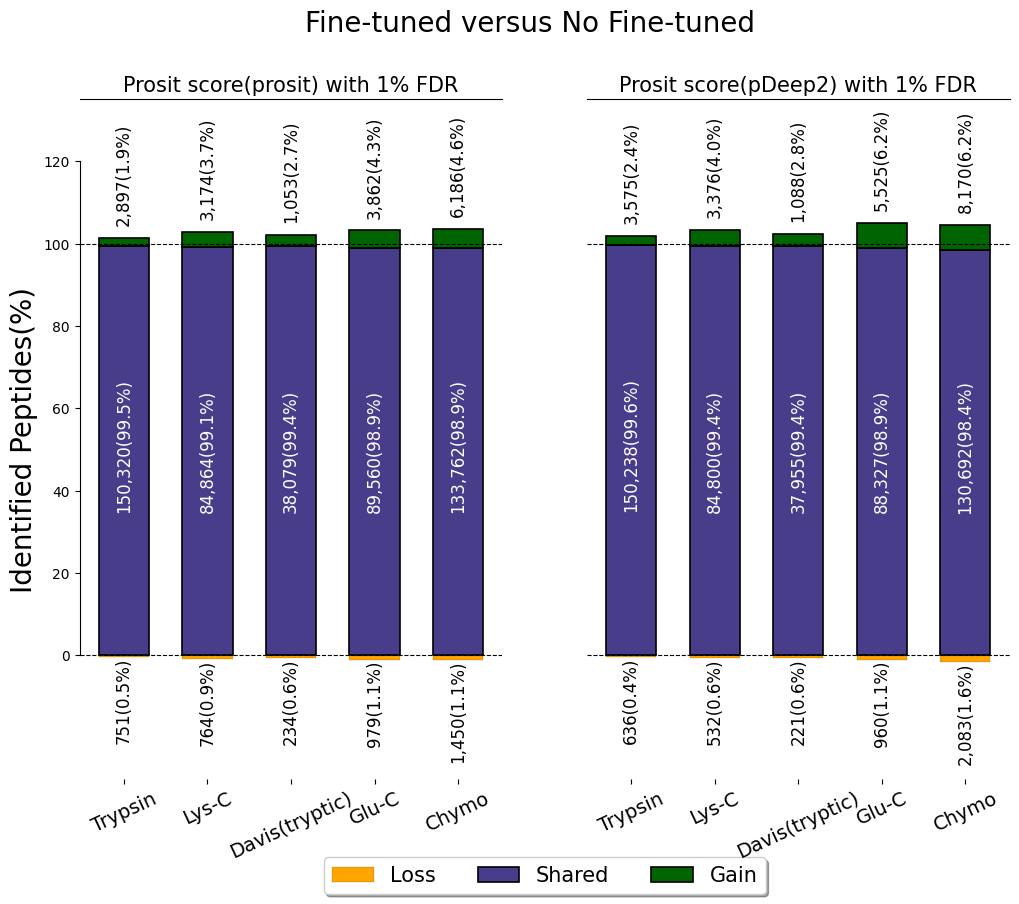

In [7]:
from matplotlib.patches import FancyBboxPatch
labels = ["trypsin", 'lysc', "davis", 'gluc', 'chymo']
show_labels = ["Trypsin", 'Lys-C', "Davis(tryptic)", 'Glu-C', 'Chymo']

losses = {}
shares = {}
gains = {}

losses_num = {}
shares_num = {}
gains_num = {}

losses['Prosit4prosit'] = [-prosit_prosit_compare[l]
                      [0]/sum(prosit_prosit_compare[l][:2])*100 for l in labels]
shares['Prosit4prosit'] = [prosit_prosit_compare[l]
                      [1]/sum(prosit_prosit_compare[l][:2])*100 for l in labels]
gains['Prosit4prosit'] = [prosit_prosit_compare[l][2] /
                     sum(prosit_prosit_compare[l][:2])*100 for l in labels]

losses_num['Prosit4prosit'] = [prosit_prosit_compare[l][0] for l in labels]
shares_num['Prosit4prosit'] = [prosit_prosit_compare[l][1] for l in labels]
gains_num['Prosit4prosit'] = [prosit_prosit_compare[l][2] for l in labels]

losses['Prosit4pDeep'] = [-pdeep_prosit_compare[l][0] /
                              sum(pdeep_prosit_compare[l][:2])*100 for l in labels]
shares['Prosit4pDeep'] = [pdeep_prosit_compare[l][1] /
                              sum(pdeep_prosit_compare[l][:2])*100 for l in labels]
gains['Prosit4pDeep'] = [pdeep_prosit_compare[l]
                             [2]/sum(pdeep_prosit_compare[l][:2])*100 for l in labels]

losses_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][0] for l in labels]
shares_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][1] for l in labels]
gains_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][2] for l in labels]

width = 0.6

names = ['Prosit4prosit', 'Prosit4pDeep']
fig, axs = plt.subplots(1, 2, figsize=(12, 9), dpi=100)

labels = [i[0].capitalize() + i[1:] for i in labels]
for i, (name, ax, show_name) in enumerate(zip(names, axs, ["Prosit score(prosit)", "Prosit score(pDeep2)"])):
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.axhline(100, color='black', linewidth=0.8, linestyle='--')

    p1 = ax.bar(show_labels, losses[name], width, label='Loss',
                color='orange', linewidth=0.1, edgecolor="black")
    p2 = ax.bar(show_labels, shares[name], width, label='Shared',
                color='darkslateblue', linewidth=1.2, edgecolor="black")
    p3 = ax.bar(show_labels, gains[name], width, label='Gain',
                bottom=shares[name], color='darkgreen', linewidth=1.2, edgecolor="black")

    num_size = 12
    autolabel(p1, ax, losses_num[name], [abs(i) for i in losses[name]], mode='bottom', fontsize=num_size)
    autolabel(p2, ax, shares_num[name], shares[name],fontsize=num_size)
    autolabel(p3, ax, gains_num[name], gains[name], mode='upper', fontsize=num_size)
    # autolabel(p3, ax, gains_num[name], mode='inside',
    #         select_idx=[1, 3], fontsize=num_size)

    if i == 0:
        ax.set_ylabel('Identified Peptides(%)', fontsize=20)
        ax.legend(loc='upper center', bbox_to_anchor=(1.1, -0.1),
                  fancybox=True, shadow=True, ncol=5, prop={'size': 15})
    ax.set_title(f'{show_name} with 1% FDR', fontsize=15)
    if i == 0:
        ax.get_yaxis().set_ticks([20 * i for i in range(7)])
        ax.spines['left'].set_bounds(0, 120)
    else:
        ax.get_yaxis().set_ticks([])
        ax.spines['left'].set_visible(False)
    ax.set_ylim(-30, 135)
    # ax.tick_params(axis='x', labelsize=15)
    # ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', labelsize=14, rotation=25)
fig.suptitle('Fine-tuned versus No Fine-tuned', fontsize=20)
fig.savefig(f"fig/fig2-bekker-prosit-pdeep-vennbar.svg",dpi=300, bbox_inches="tight")

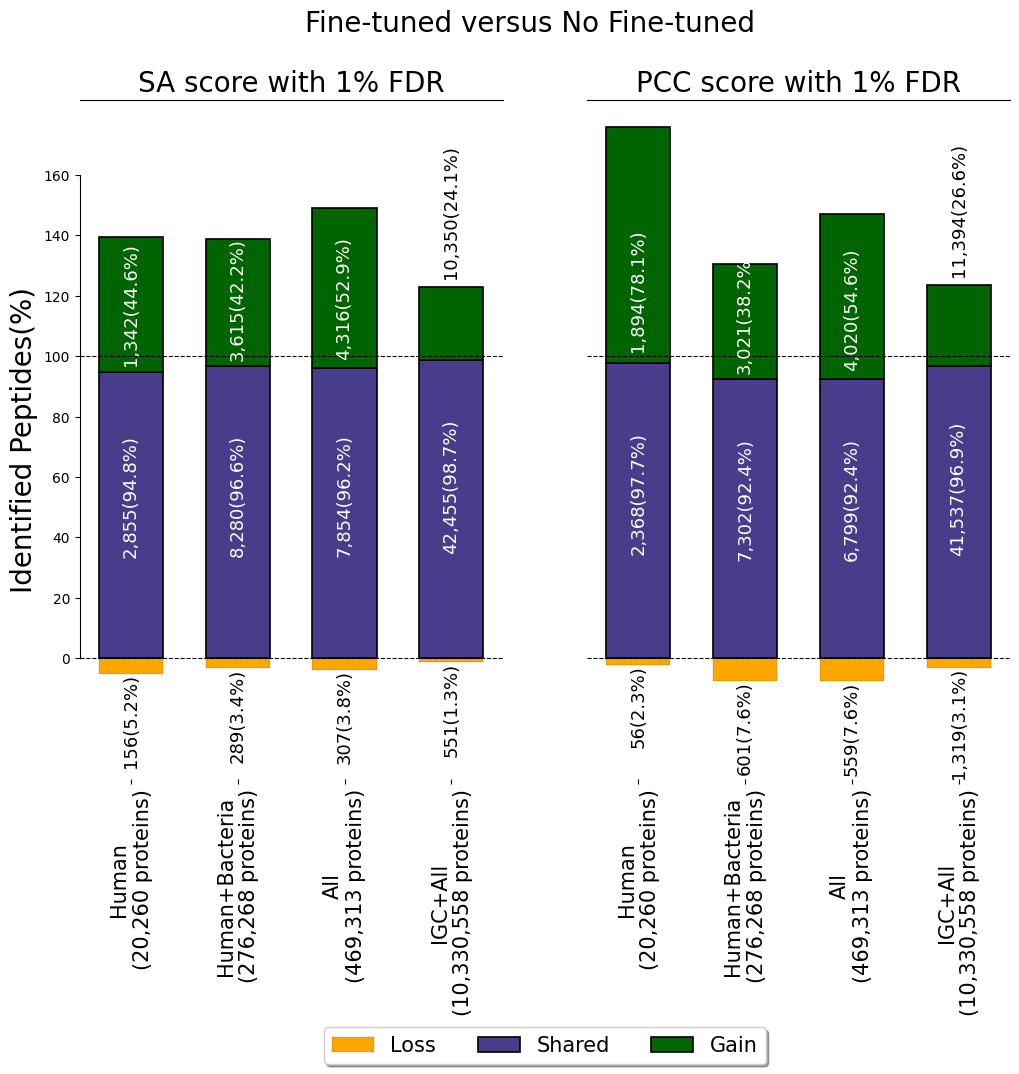

In [18]:
from matplotlib.patches import FancyBboxPatch
labels = ["sprot_human", 'sprot_bacteria_human', 'sprot_all', 'IGC', ]

losses = {}
shares = {}
gains = {}

losses_num = {}
shares_num = {}
gains_num = {}

losses['SA score'] = [-sa_compare[l][0]/sum(sa_compare[l][:2])*100 for l in labels]
shares['SA score'] = [sa_compare[l][1]/sum(sa_compare[l][:2])*100 for l in labels]
gains['SA score'] = [sa_compare[l][2]/sum(sa_compare[l][:2])*100 for l in labels]

losses_num['SA score'] = [sa_compare[l][0] for l in labels]
shares_num['SA score'] = [sa_compare[l][1] for l in labels]
gains_num['SA score'] = [sa_compare[l][2] for l in labels]

losses['PCC score'] = [-pcc_compare[l][0]/sum(pcc_compare[l][:2])*100 for l in labels]
shares['PCC score'] = [pcc_compare[l][1]/sum(pcc_compare[l][:2])*100 for l in labels]
gains['PCC score'] = [pcc_compare[l][2]/sum(pcc_compare[l][:2])*100 for l in labels]

losses_num['PCC score'] = [pcc_compare[l][0] for l in labels]
shares_num['PCC score'] = [pcc_compare[l][1] for l in labels]
gains_num['PCC score'] = [pcc_compare[l][2] for l in labels]

width = 0.6

names = ['SA score', 'PCC score']
fig, axs = plt.subplots(1, 2, figsize=(12, 9), dpi=100)

labels = ["Human\n(20,260 proteins)", 'Human+Bacteria\n(276,268 proteins)', 'All\n(469,313 proteins)', 'IGC+All\n(10,330,558 proteins)']
for i, (name, ax) in enumerate(zip(names, axs)):
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.axhline(100, color='black', linewidth=0.8, linestyle='--')

    p1 = ax.bar(labels, losses[name], width, label='Loss',
                color='orange', linewidth=0.1, edgecolor="black")
    p2 = ax.bar(labels, shares[name], width, label='Shared',
                color='darkslateblue', linewidth=1.2, edgecolor="black")
    p3 = ax.bar(labels, gains[name], width, label='Gain',
                bottom=shares[name], color='darkgreen', linewidth=1.2, edgecolor="black")

    num_size = 13
    autolabel(p1, ax, losses_num[name], [abs(i) for i in losses[name]], mode='bottom', fontsize=num_size)
    autolabel(p2, ax, shares_num[name], shares[name], fontsize=num_size)
    autolabel(p3, ax, gains_num[name], gains[name],mode='upper',
            select_idx=[3], fontsize=num_size)
    autolabel(p3, ax, gains_num[name], gains[name], mode='inside', select_idx=[0, 1, 2], fontsize=num_size, inside_height=0.05)

    if i ==0:
        ax.set_ylabel('Identified Peptides(%)', fontsize=20)
        ax.legend(loc='upper center', bbox_to_anchor=(1.1, -0.35),
                  fancybox=True, shadow=True, ncol=5, prop={'size': 15})
    ax.set_title(f'{name} with 1% FDR', fontsize=20)
    ax.set_ylim(-40, 185)
    # ax.set_xticklabels(ax.get_xticks(), rotation=45)
    if i == 0:
        ax.get_yaxis().set_ticks([20*i for i in range(9)])
        ax.spines['left'].set_bounds(0, 160)
    else:
        ax.get_yaxis().set_ticks([])
        ax.spines['left'].set_visible(False)
    ax.tick_params(axis='x', labelsize=20)
    # ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='x', labelsize=15, rotation=90)
fig.suptitle('Fine-tuned versus No Fine-tuned', fontsize=20)
fig.savefig(f"fig/fig2-human-sa-pcc-vennbar.svg",dpi=300, bbox_inches="tight")

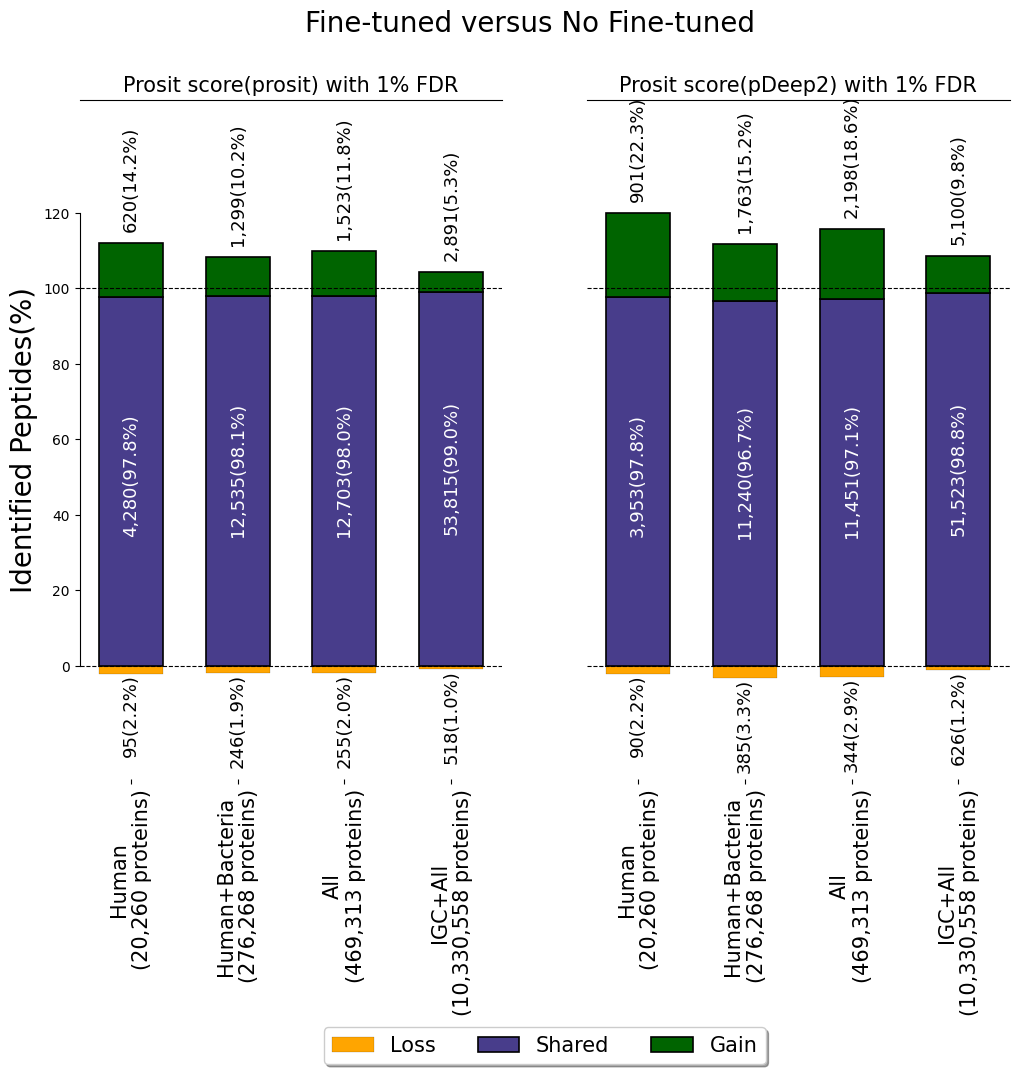

In [20]:
from matplotlib.patches import FancyBboxPatch
labels = ["sprot_human", 'sprot_bacteria_human', 'sprot_all', 'IGC', ]

losses = {}
shares = {}
gains = {}

losses_num = {}
shares_num = {}
gains_num = {}

losses['Prosit4prosit'] = [-prosit_prosit_compare[l]
                      [0]/sum(prosit_prosit_compare[l][:2])*100 for l in labels]
shares['Prosit4prosit'] = [prosit_prosit_compare[l]
                      [1]/sum(prosit_prosit_compare[l][:2])*100 for l in labels]
gains['Prosit4prosit'] = [prosit_prosit_compare[l][2] /
                     sum(prosit_prosit_compare[l][:2])*100 for l in labels]

losses_num['Prosit4prosit'] = [prosit_prosit_compare[l][0] for l in labels]
shares_num['Prosit4prosit'] = [prosit_prosit_compare[l][1] for l in labels]
gains_num['Prosit4prosit'] = [prosit_prosit_compare[l][2] for l in labels]

losses['Prosit4pDeep'] = [-pdeep_prosit_compare[l][0] /
                              sum(pdeep_prosit_compare[l][:2])*100 for l in labels]
shares['Prosit4pDeep'] = [pdeep_prosit_compare[l][1] /
                              sum(pdeep_prosit_compare[l][:2])*100 for l in labels]
gains['Prosit4pDeep'] = [pdeep_prosit_compare[l]
                             [2]/sum(pdeep_prosit_compare[l][:2])*100 for l in labels]

losses_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][0] for l in labels]
shares_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][1] for l in labels]
gains_num['Prosit4pDeep'] = [pdeep_prosit_compare[l][2] for l in labels]

width = 0.6

names = ['Prosit4prosit', 'Prosit4pDeep']
fig, axs = plt.subplots(1, 2, figsize=(12, 9), dpi=100)

labels = ["Human\n(20,260 proteins)", 'Human+Bacteria\n(276,268 proteins)', 'All\n(469,313 proteins)', 'IGC+All\n(10,330,558 proteins)']
for i, (name, ax, show_name) in enumerate(zip(names, axs, ["Prosit score(prosit)", "Prosit score(pDeep2)"])):
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.axhline(100, color='black', linewidth=0.8, linestyle='--')

    p1 = ax.bar(labels, losses[name], width, label='Loss',
                color='orange', linewidth=0.1, edgecolor="black")
    p2 = ax.bar(labels, shares[name], width, label='Shared',
                color='darkslateblue', linewidth=1.2, edgecolor="black")
    p3 = ax.bar(labels, gains[name], width, label='Gain',
                bottom=shares[name], color='darkgreen', linewidth=1.2, edgecolor="black")

    num_size = 13
    autolabel(p1, ax, losses_num[name], [abs(i) for i in losses[name]], mode='bottom', fontsize=num_size)
    autolabel(p2, ax, shares_num[name], shares[name], fontsize=num_size)
    autolabel(p3, ax, gains_num[name], gains[name],mode='upper', fontsize=num_size)
    # autolabel(p3, ax, gains_num[name], mode='inside',
    #         select_idx=[1, 3], fontsize=num_size)

    if i ==0:
        ax.set_ylabel('Identified Peptides(%)', fontsize=20)
        ax.legend(loc='upper center', bbox_to_anchor=(1.1, -0.35),
                  fancybox=True, shadow=True, ncol=5, prop={'size': 15})
    ax.set_title(f'{show_name} with 1% FDR', fontsize=15)
    ax.set_ylim(-30, 150)
    if i == 0:
        ax.get_yaxis().set_ticks([20*i for i in range(7)])
        ax.spines['left'].set_bounds(0, 120)
    else:
        ax.get_yaxis().set_ticks([])
        ax.spines['left'].set_visible(False)
    # ax.tick_params(axis='x', labelsize=15)
    # ax.spines['top'].set_visible(False)
    ax.tick_params(axis='x', labelsize=15, rotation=90)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
fig.suptitle('Fine-tuned versus No Fine-tuned', fontsize=20)
# fig.autofmt_xdate(rotation=15)
fig.savefig(f"fig/fig2-human-prosit-pdeep-vennbar.svg",dpi=300, bbox_inches="tight")